![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)



# Proyecto

### Equipo:

- Benjamín Farías
- Jordán Pérez


### Link de repositorio de GitHub: `https://github.com/IsaacJordan-bit/Laboratorio-de-programaci-n-cientifica/upload/main/Laboratorios/Proyecto1`



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Introducción


En este proyecto, se abordará la tarea de detección de fraudes bancarios utilizando el dataset "The Bank Account Fraud (BAF)". El objetivo principal es desarrollar un análisis exhaustivo de los datos proporcionados y buscar anomalías de forma automatizada para identificar posibles casos de fraude.


La tarea principal es utilizar técnicas de detección de fraudes para identificar transacciones o comportamientos inusuales en el dataset bancario. El dataset proporcionado contiene información relevante sobre las actividades realizadas por los clientes en el banco, y se espera que mediante el análisis de estas actividades se puedan identificar posibles casos de fraude.
El dataset "The Bank Account Fraud (BAF)" consiste en un conjunto de datos realistas de casos de detección de fraude bancario. Este dataset es proporcionado con el propósito de evaluar métodos de detección de fraudes y presenta varias características importantes como sesgo (existen sesgos sistemáticos en los datos que deben ser tenidos en cuenta durante el análisis y la interpretación de los resultados), desbalanceo (se trata de un problema de clasificación desbalanceado, lo que puede afectar el rendimiento de los modelos de detección de anomalías), dinamismo (esto implica que es necesario considerar la temporalidad y adaptar los modelos o técnicas utilizadas a posibles cambios en la distribución de los datos), preservación de la privacidad (el dataset ha sido anonimizado o protegido para preservar la privacidad de los clientes)


Para abordar el problema de detección de fraudes en el dataset, se podrían plantear las siguientes hipótesis:
- La detección de fraudes puede basarse en la identificación de patrones anómalos en las transacciones o comportamientos de los clientes.
- Se pueden utilizar técnicas de detección de outliers y modelado estadístico para identificar transacciones o comportamientos inusuales que puedan indicar casos de fraude.
- El análisis exploratorio de datos permitirá comprender mejor la estructura de los datos, identificar posibles sesgos y establecer relaciones entre variables relevantes para la detección de fraudes.

## 2. Lectura y Manejo de Datos




### 2.1 Cargar datos en dataframes

In [ ]:
df_1 = pd.read_parquet('/content/drive/MyDrive/Noveno semestre/Laboratorio de programación/Proyecto 1/df_1.parquet')
df_2 = pd.read_parquet('/content/drive/MyDrive/Noveno semestre/Laboratorio de programación/Proyecto 1/df_2.parquet')
df_email_phone = pd.read_parquet('/content/drive/MyDrive/Noveno semestre/Laboratorio de programación/Proyecto 1/df_email_phone.parquet')

### 2.2 Exploración inicial

Se realiza una revisión simple de los dataframes a través de los métodos `head` e `info`.

In [ ]:
print("df_1:")
display(df_1.head())
display(df_1.info())

df_1:


id  fraud_bool  income  prev_address_months_count  \
104446  729517           0     0.7                         -1   
269483  149585           0     0.8                         -1   
4102     64486           0     0.9                         -1   
351767  825283           0     0.5                         -1   
126377    8308           0     0.9                         -1   

        current_address_months_count  customer_age  days_since_request  \
104446                           305            60            0.030059   
269483                           140            50            0.015659   
4102                             171            50            0.001409   
351767                            85            30            0.027292   
126377                            39            30            0.010945   

        intended_balcon_amount payment_type  zip_count_4w  ...  \
104446               -1.599455           AC           990  ...   
269483                3.951994           AA          1269  ...   
4102                 28.159779           AB          4430  ...   
351767               -1.310498           AB          1698  ...   
126377               -1.450972           AC           569  ...   

        proposed_credit_limit  foreign_request    source  \
104446                  500.0                0  INTERNET   
269483                  200.0                0  INTERNET   
4102                   1500.0                0  INTERNET   
351767                  200.0                0  INTERNET   
126377                  200.0                0  INTERNET   

        session_length_in_minutes device_os  keep_alive_session  \
104446                   8.865992   windows                   0   
269483                   4.654872     linux                   1   
4102                     3.720953     linux                   1   
351767                   2.912670   windows                   1   
126377                   2.283680     other                   1   

       device_fraud_count  month        x1        x2  
104446                  0      2 -0.245425  0.568811  
269483                  0      7  0.009336 -2.096682  
4102                    0      1  2.229616 -0.005823  
351767                  0      3 -0.193945  0.861207  
126377                  0      3 -2.440650  0.354986  

[5 rows x 29 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389782 entries, 104446 to 193209
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            389782 non-null  int64  
 1   fraud_bool                    389782 non-null  int64  
 2   income                        389782 non-null  float64
 3   prev_address_months_count     389782 non-null  int64  
 4   current_address_months_count  389782 non-null  int64  
 5   customer_age                  389782 non-null  int64  
 6   days_since_request            389782 non-null  float64
 7   intended_balcon_amount        389782 non-null  float64
 8   payment_type                  389782 non-null  object 
 9   zip_count_4w                  389782 non-null  int64  
 10  velocity_6h                   389782 non-null  float64
 11  velocity_24h                  389782 non-null  float64
 12  velocity_4w                   389782 no

None

In [ ]:
print("df_2:")
display(df_2.head())
display(df_2.info())

df_2:


id  fraud_bool  income  prev_address_months_count  \
699954  303612           0     0.8                         -1   
701206  568066           0     0.9                         -1   
270304  893344           0     0.7                         -1   
346538  247688           0     0.8                         -1   
147297  674478           0     0.8                         -1   

        current_address_months_count  customer_age  days_since_request  \
699954                            21            40            0.010837   
701206                            70            50            0.711485   
270304                           133            50            0.006856   
346538                           207            50            0.026194   
147297                            24            50            0.012646   

        intended_balcon_amount payment_type  zip_count_4w  ...  \
699954               -0.853976           AD           239  ...   
701206               25.137456           AA          1873  ...   
270304               -0.815330           AC           675  ...   
346538               -0.736615           AB           999  ...   
147297               10.744253           AA          3198  ...   

        proposed_credit_limit  foreign_request    source  \
699954                  200.0                0  INTERNET   
701206                  200.0                0  INTERNET   
270304                 1000.0                0  INTERNET   
346538                  200.0                0  INTERNET   
147297                  500.0                1  INTERNET   

        session_length_in_minutes device_os  keep_alive_session  \
699954                  48.127390     other                   0   
701206                   8.792273   windows                   1   
270304                  15.916225     other                   1   
346538                   0.509942     linux                   1   
147297                  10.562945     other                   0   

       device_fraud_count  month        x1        x2  
699954                  0      3  0.236931  0.077061  
701206                  0      3  0.571536  1.151563  
270304                  0      7  0.224252 -0.590459  
346538                  0      6  0.648528 -0.315911  
147297                  0      6  0.041475  0.383332  

[5 rows x 29 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747410 entries, 699954 to 384611
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            747410 non-null  int64  
 1   fraud_bool                    747410 non-null  int64  
 2   income                        747410 non-null  float64
 3   prev_address_months_count     747410 non-null  int64  
 4   current_address_months_count  747410 non-null  int64  
 5   customer_age                  747410 non-null  int64  
 6   days_since_request            747410 non-null  float64
 7   intended_balcon_amount        747410 non-null  float64
 8   payment_type                  747410 non-null  object 
 9   zip_count_4w                  747410 non-null  int64  
 10  velocity_6h                   747410 non-null  float64
 11  velocity_24h                  747410 non-null  float64
 12  velocity_4w                   747410 no

None

In [ ]:
print("df_email_phone:")
display(df_email_phone.head())
display(df_email_phone.info())

df_email_phone:


id  name_email_similarity  date_of_birth_distinct_emails_4w  \
987231  624588               0.555653                                15   
79954   620810               0.849718                                 2   
567130  580633               0.110898                                 3   
500891    6379               0.671250                                15   
55399   366511               0.772932                                 7   

        email_is_free  device_distinct_emails_8w  phone_home_valid  \
987231              0                          1                 0   
79954               0                          1                 0   
567130              0                          1                 1   
500891              0                          1                 0   
55399               0                          1                 0   

        phone_mobile_valid  
987231                   1  
79954                    0  
567130                   0  
500891                   1  
55399                    1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934730 entries, 987231 to 986114
Data columns (total 7 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id                                934730 non-null  int64  
 1   name_email_similarity             934730 non-null  float64
 2   date_of_birth_distinct_emails_4w  934730 non-null  int64  
 3   email_is_free                     934730 non-null  int64  
 4   device_distinct_emails_8w         934730 non-null  int64  
 5   phone_home_valid                  934730 non-null  int64  
 6   phone_mobile_valid                934730 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 57.1 MB


None

In [ ]:
print("Número de filas y columnas:", df_1.shape)
print("Número de filas y columnas:", df_2.shape)
print("Número de filas y columnas:", df_email_phone.shape)


Número de filas y columnas: (389782, 29)
Número de filas y columnas: (747410, 29)
Número de filas y columnas: (934730, 7)


### 2.3 Unir dataframes

Se concatenan los datasets 1 y 2.

In [ ]:
df_3 = pd.concat([df_1, df_2], ignore_index=True)

In [ ]:
df_combined.head()

id  fraud_bool  income  prev_address_months_count  \
0  729517           0     0.7                         -1   
1  149585           0     0.8                         -1   
2   64486           0     0.9                         -1   
3  825283           0     0.5                         -1   
4    8308           0     0.9                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                           305            60            0.030059   
1                           140            50            0.015659   
2                           171            50            0.001409   
3                            85            30            0.027292   
4                            39            30            0.010945   

   intended_balcon_amount payment_type  zip_count_4w  ...  \
0               -1.599455           AC           990  ...   
1                3.951994           AA          1269  ...   
2               28.159779           AB          4430  ...   
3               -1.310498           AB          1698  ...   
4               -1.450972           AC           569  ...   

   proposed_credit_limit  foreign_request    source  \
0                  500.0                0  INTERNET   
1                  200.0                0  INTERNET   
2                 1500.0                0  INTERNET   
3                  200.0                0  INTERNET   
4                  200.0                0  INTERNET   

   session_length_in_minutes device_os  keep_alive_session device_fraud_count  \
0                   8.865992   windows                   0                  0   
1                   4.654872     linux                   1                  0   
2                   3.720953     linux                   1                  0   
3                   2.912670   windows                   1                  0   
4                   2.283680     other                   1                  0   

   month        x1        x2  
0      2 -0.245425  0.568811  
1      7  0.009336 -2.096682  
2      1  2.229616 -0.005823  
3      3 -0.193945  0.861207  
4      3 -2.440650  0.354986  

[5 rows x 29 columns]

In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137192 entries, 0 to 1137191
Data columns (total 29 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   id                            1137192 non-null  int64  
 1   fraud_bool                    1137192 non-null  int64  
 2   income                        1137192 non-null  float64
 3   prev_address_months_count     1137192 non-null  int64  
 4   current_address_months_count  1137192 non-null  int64  
 5   customer_age                  1137192 non-null  int64  
 6   days_since_request            1137192 non-null  float64
 7   intended_balcon_amount        1137192 non-null  float64
 8   payment_type                  1137192 non-null  object 
 9   zip_count_4w                  1137192 non-null  int64  
 10  velocity_6h                   1137192 non-null  float64
 11  velocity_24h                  1137192 non-null  float64
 12  velocity_4w                 

### 2.4 Unir nuevas variables

Se unen los dataframes utilizando el método `merge` con estratégia "outer".

In [ ]:
df_4 = df_3.merge(df_email_phone, how='outer')

In [ ]:
df_4.head()

id  fraud_bool  income  prev_address_months_count  \
0  729517         0.0     0.7                       -1.0   
1  729517         0.0     0.7                       -1.0   
2  149585         0.0     0.8                       -1.0   
3  149585         0.0     0.8                       -1.0   
4   64486         0.0     0.9                       -1.0   

   current_address_months_count  customer_age  days_since_request  \
0                         305.0          60.0            0.030059   
1                         305.0          60.0            0.030059   
2                         140.0          50.0            0.015659   
3                         140.0          50.0            0.015659   
4                         171.0          50.0            0.001409   

   intended_balcon_amount payment_type  zip_count_4w  ...  device_fraud_count  \
0               -1.599455           AC         990.0  ...                 0.0   
1               -1.599455           AC         990.0  ...                 0.0   
2                3.951994           AA        1269.0  ...                 0.0   
3                3.951994           AA        1269.0  ...                 0.0   
4               28.159779           AB        4430.0  ...                 0.0   

   month        x1        x2 name_email_similarity  \
0    2.0 -0.245425  0.568811              0.883485   
1    2.0 -0.245425  0.568811              0.883485   
2    7.0  0.009336 -2.096682              0.113208   
3    7.0  0.009336 -2.096682              0.113208   
4    1.0  2.229616 -0.005823              0.792797   

   date_of_birth_distinct_emails_4w email_is_free  device_distinct_emails_8w  \
0                               2.0           1.0                        1.0   
1                               2.0           1.0                        1.0   
2                               4.0           1.0                        1.0   
3                               4.0           1.0                        1.0   
4                               4.0           0.0                        1.0   

   phone_home_valid  phone_mobile_valid  
0               0.0                 1.0  
1               0.0                 1.0  
2               1.0                 1.0  
3               1.0                 1.0  
4               0.0                 1.0  

[5 rows x 35 columns]

In [ ]:
df_4.shape

(1198151, 35)

El dataframe resultante tiene 1198151 filas y 35 columnas.

In [ ]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198151 entries, 0 to 1198150
Data columns (total 35 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   id                                1198151 non-null  int64  
 1   fraud_bool                        1137192 non-null  float64
 2   income                            1137192 non-null  float64
 3   prev_address_months_count         1137192 non-null  float64
 4   current_address_months_count      1137192 non-null  float64
 5   customer_age                      1137192 non-null  float64
 6   days_since_request                1137192 non-null  float64
 7   intended_balcon_amount            1137192 non-null  float64
 8   payment_type                      1137192 non-null  object 
 9   zip_count_4w                      1137192 non-null  float64
 10  velocity_6h                       1137192 non-null  float64
 11  velocity_24h                      113

### 2.5 Verificar nulos y duplicados, generar explicaciones sobre sus fuentes y proponer soluciones.



In [ ]:
print("Nulos en el dataset combinado:")
print(df_4.isnull().sum())

Nulos en el dataset combinado:
id                                      0
fraud_bool                          60959
income                              60959
prev_address_months_count           60959
current_address_months_count        60959
customer_age                        60959
days_since_request                  60959
intended_balcon_amount              60959
payment_type                        60959
zip_count_4w                        60959
velocity_6h                         60959
velocity_24h                        60959
velocity_4w                         60959
bank_branch_count_8w                60959
employment_status                   60959
credit_risk_score                   60959
housing_status                      60959
bank_months_count                   60959
has_other_cards                     60959
proposed_credit_limit               60959
foreign_request                     60959
source                              60959
session_length_in_minutes           60959
dev

In [ ]:
# Ejemplos de nulos
print("Ejemplos de nulos:")
display(df_4[df_4.isnull().any(axis=1)].head(5))

Ejemplos de nulos:


id  fraud_bool  income  prev_address_months_count  \
428832  893344         0.0     0.7                       -1.0   
428833  893344         0.0     0.7                       -1.0   
428834  893344         0.0     0.7                       -1.0   
428835  893344         0.0     0.7                       -1.0   
428853  762227         0.0     0.8                       -1.0   

        current_address_months_count  customer_age  days_since_request  \
428832                         133.0          50.0            0.006856   
428833                         133.0          50.0            0.006856   
428834                         133.0          50.0            0.006856   
428835                         133.0          50.0            0.006856   
428853                          78.0          40.0            0.017146   

        intended_balcon_amount payment_type  zip_count_4w  ...  \
428832               -0.815330           AC         675.0  ...   
428833               -0.815330           AC         675.0  ...   
428834               -0.815330           AC         675.0  ...   
428835               -0.815330           AC         675.0  ...   
428853               51.794412           AA         932.0  ...   

        device_fraud_count  month        x1        x2 name_email_similarity  \
428832                 0.0    7.0  0.224252 -0.590459                   NaN   
428833                 0.0    7.0  0.224252 -0.590459                   NaN   
428834                 0.0    7.0  0.224252 -0.590459                   NaN   
428835                 0.0    7.0  0.224252 -0.590459                   NaN   
428853                 0.0    2.0 -0.265474 -1.189797                   NaN   

        date_of_birth_distinct_emails_4w email_is_free  \
428832                               NaN           NaN   
428833                               NaN           NaN   
428834                               NaN           NaN   
428835                               NaN           NaN   
428853                               NaN           NaN   

        device_distinct_emails_8w  phone_home_valid  phone_mobile_valid  
428832                        NaN               NaN                 NaN  
428833                        NaN               NaN                 NaN  
428834                        NaN               NaN                 NaN  
428835                        NaN               NaN                 NaN  
428853                        NaN               NaN                 NaN  

[5 rows x 35 columns]

Las columnas de la 1 a la 28 tienen 60959 nulos y las columnas desde la 29 a la 34 tienen 79727 nulos. De la exploración inicial se sabe que los datasets originales no hay nulos, de modo que su presencia en el dataframe se debe a utilizar merge con la estrategia `outer`, la cual utiliza la unión de las llaves de ambos dataframes, dejando nulos en las filas donde la llave existe en un dataframe mas no el el otro.

In [ ]:
# Conteo de duplicados
print("Duplicados en el dataset combinado:")
print(df_4.duplicated().sum())

Duplicados en el dataset combinado:
202334


In [ ]:
# Ejemplos de duplicados
print("Ejemplos de duplicados:")
display(df_4[df_4.duplicated()].head(5))

Ejemplos de duplicados:


id  fraud_bool  income  prev_address_months_count  \
1   729517         0.0     0.7                       -1.0   
3   149585         0.0     0.8                       -1.0   
6   825283         0.0     0.5                       -1.0   
8     8308         0.0     0.9                       -1.0   
10  891636         0.0     0.6                       -1.0   

    current_address_months_count  customer_age  days_since_request  \
1                          305.0          60.0            0.030059   
3                          140.0          50.0            0.015659   
6                           85.0          30.0            0.027292   
8                           39.0          30.0            0.010945   
10                         137.0          60.0            0.046158   

    intended_balcon_amount payment_type  zip_count_4w  ...  \
1                -1.599455           AC         990.0  ...   
3                 3.951994           AA        1269.0  ...   
6                -1.310498           AB        1698.0  ...   
8                -1.450972           AC         569.0  ...   
10               25.841925           AA        1512.0  ...   

    device_fraud_count  month        x1        x2 name_email_similarity  \
1                  0.0    2.0 -0.245425  0.568811              0.883485   
3                  0.0    7.0  0.009336 -2.096682              0.113208   
6                  0.0    3.0 -0.193945  0.861207              0.865082   
8                  0.0    3.0 -2.440650  0.354986              0.450024   
10                 0.0    2.0  2.192960  0.484068              0.383238   

    date_of_birth_distinct_emails_4w email_is_free  device_distinct_emails_8w  \
1                                2.0           1.0                        1.0   
3                                4.0           1.0                        1.0   
6                               10.0           0.0                        1.0   
8                               13.0           1.0                        1.0   
10                               2.0           1.0                        1.0   

    phone_home_valid  phone_mobile_valid  
1                0.0                 1.0  
3                1.0                 1.0  
6                0.0                 1.0  
8                0.0                 0.0  
10               1.0                 1.0  

[5 rows x 35 columns]

Para contar las filas duplicadas se utiliza `duplicated`. El dataframe presenta 202334 filas duplicadas.

Asumiendo que se desea trabajar con todas las variables en conjunto, dado que si no no habría motivo para unir los dataframes, se deben eliminar las filas con valores faltantes. Los valores faltantes se pueden evitar simplemente uniendo los dataframes con la estratégia "inner", que considera la intersección entre las llaves, en vez de "outer", puesto que la única razón de haber utilizado esta última es generar nulos artificialmente. También se decide eliminar las filas repetidas, mediante `drop_duplicates`, puesto que, como cada fila distingue a un individuo, lo más probable es que se trate de un error en los datos. Es posible que existieran duplicados entre df_1 y df_2.

### 2.6 Limpiar

In [ ]:
df_4 = df_3.merge(df_email_phone, how='inner')

In [ ]:
df_4.duplicated().sum()

183694

In [ ]:
print(df_4.isnull().sum())

id                                  0
fraud_bool                          0
income                              0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
employment_status                   0
credit_risk_score                   0
housing_status                      0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_length_in_minutes           0
device_os                           0
keep_alive_session                  0
device_fraud_count                  0
month       

Luego de eliminar los valores faltantes el dataframe sigue teniendo filas duplicadas.

In [ ]:
df_4 = df_4.drop_duplicates()

In [ ]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873771 entries, 0 to 1057464
Data columns (total 35 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id                                873771 non-null  int64  
 1   fraud_bool                        873771 non-null  int64  
 2   income                            873771 non-null  float64
 3   prev_address_months_count         873771 non-null  int64  
 4   current_address_months_count      873771 non-null  int64  
 5   customer_age                      873771 non-null  int64  
 6   days_since_request                873771 non-null  float64
 7   intended_balcon_amount            873771 non-null  float64
 8   payment_type                      873771 non-null  object 
 9   zip_count_4w                      873771 non-null  int64  
 10  velocity_6h                       873771 non-null  float64
 11  velocity_24h                      873771 non-null  

Finalmente el dataframe tiene 873771 filas y 35 columnas.

### 2.7 Segmentación

Se añade al dataframe la columna 'segmentacion_etaria' con una variable categórica que resume la edad del usuario.

In [ ]:
def segmento(edad):
    if edad < 18:
        return 'Joven'
    elif edad < 27:
        return 'Adulto-Joven'
    elif edad < 59:
        return 'Adulto'
    return 'Persona Mayor'

df_4['segmentacion_etaria'] = df_4.customer_age.apply(segmento)

In [ ]:
df_4.head()

id  fraud_bool  income  prev_address_months_count  \
0  729517           0     0.7                         -1   
2  149585           0     0.8                         -1   
4   64486           0     0.9                         -1   
5  825283           0     0.5                         -1   
7    8308           0     0.9                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                           305            60            0.030059   
2                           140            50            0.015659   
4                           171            50            0.001409   
5                            85            30            0.027292   
7                            39            30            0.010945   

   intended_balcon_amount payment_type  zip_count_4w  ...  month        x1  \
0               -1.599455           AC           990  ...      2 -0.245425   
2                3.951994           AA          1269  ...      7  0.009336   
4               28.159779           AB          4430  ...      1  2.229616   
5               -1.310498           AB          1698  ...      3 -0.193945   
7               -1.450972           AC           569  ...      3 -2.440650   

         x2  name_email_similarity date_of_birth_distinct_emails_4w  \
0  0.568811               0.883485                                2   
2 -2.096682               0.113208                                4   
4 -0.005823               0.792797                                4   
5  0.861207               0.865082                               10   
7  0.354986               0.450024                               13   

   email_is_free device_distinct_emails_8w  phone_home_valid  \
0              1                         1                 0   
2              1                         1                 1   
4              0                         1                 0   
5              0                         1                 0   
7              1                         1                 0   

   phone_mobile_valid  segmentacion_etaria  
0                   1        Persona Mayor  
2                   1               Adulto  
4                   1               Adulto  
5                   1               Adulto  
7                   0               Adulto  

[5 rows x 36 columns]

## 3. Análisis Exploratorio de Datos

In [ ]:
!pip install ydata_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 79.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=734c72a6710a42fa13e7a894bb26e6ae55a4f5b6481b2997fd6082b692d4c4ac
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_4, title="EDA")
profile.to_file("eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 3.1 Análisis del EDA

Del html generado se tienen a primera vista las siguientes observaciones:

- Cerca de un 1% de los casos son fraude
- La columna income tiene 9 valores discretos de 0.1 a 0.9, con paso de 0.1. Se observa que la cantidad de ocurrencias de cada valor desciende de 0.1 a 0.3, tiene un máximo local en 0.4 y ascende de 0.5 a 0.9. 0.9 es el valor más común, con un 24% de los casos, seguido de 0.8 y 0.1. No tiene distribución concoida.
- La gran mayoría de los casos de prev_address_month_count son -1. Existiendo valores hasta 399, donde el 95% de los datos se encuentra bajo la cantidad de 96 meses, por tanto es lógico suponer que los valores superiores a este puedan corresponder a ouliers
- El desbalance de la distribución de current_address_month_count es menos extremo, con un descenso exponencial, pero más suave, de -1 a 429 y con el 95% de los datos bajo la cantidad de 303 meses y el 87.4% de los valores por sobre 12 meses.
- Según la columna "customer_age", la mayoría de los usuario, cerca del 40%, tienen alrededor de 50 años. Cerca del 1% tienen menos de 20 y menos del 3% más de 60. No tiene una distribución clara pero podría aproximarse a una distribución normal desbalanceada.
- days_since_request contiene valores continuo donde el 95% de los valores se encuentran entre 0 y 3.64, con outliers que alcanzan valores de hasta más de 70. No hay distribución conocida debido al gran desvalance.
- La columna intended_balcon_amount contiene valores continuos, el 75% entre -16 y 0. Los valores mayores a 0 se distribullen principalmente hasta 50, con outliers cercanos a 100. No hay distribución conocida.
- payment_type tiene 5 categorías: AA (25%), AB (40%), AC (24.7%), AD (10.4%) y AE (< 0.1%).
- zip_count_4w tiene alrededor de 620 valores entreros entre 1 y 6650. Presenta una distribución bimodal cargada a la izquierda con centros alrededor de 1000 y 2600, siendo el primero cerca de 5 veces más frecuente que el segundo.
- velocity_6h tiene valores continuos positivos y negativos, aunque estos últimos son tan pocos que se podrían considerar outliers. Tiene una distribución semegante a una normal de media 5491 con una cola extendida a la derecha.
- velocity_24h tiene valores continuos entre 1000 y 10000, con tres picos cerca de 3000, 5000 y 6750, los dos primeros son más de dos veces el tercero.
- velocity_4w tiene valores continuos entre 2870 y 7020 con distribución irregular.
- branch_bank_count_8w contiene valores enteros de 0 a 2377, la mayoría de los casos son 1 y 0, sumando un 29% entre los 2.
- employment_status tiene 7 valores categóricos: CA (68.5%), CB (13.5%), CC (8.9%), CD (2.7%), CE (1.9%), CF (4.5%) y CG (< 0.1%).
- credit_risk_score contiene valores enteros entre -177 y 387, los valorer negativos son cosiderablemente menos frecuentes que el resto, por sobre el 0 los datos tienen distribución bimodal de centros 110 y 190.
- housing_status tiene 7 valores categóricos: BA (33.5%), BB (30.1%), BC (21.6%), BD (12%), BE (2.6%), BF (0.2%) y BG (< 0.1%).
- bank_months_count contiene valores enteros entre -1 y 32 con distribución irregular. Los dos valores más comunes son -1 y 1 con un 24.7% y 18% respectivamente. No hay ceros.
- has_other_cards es una variable binaria. El 75% de los casos es 0, lo que indica que la mayoría de los usuarios tiene una única tarjeta.
- proposed_credit_limit contiene 12 valores únicos. Los 4 más comunes son 200, 1500, 500 y 1000, con un 58%, 16.3%, 14% y 9.1% respectivamente.
- foreing_request es una variable binaria. El 97.6% son 0.
- La columna source tiene 2 categorías, internet y teleapp. El 99.2% de los casos corresponde a internet.
- session_lentgh_in_minutes contiene valores continuos positivos con distribución logarítmica. Un 0.2% de las filas tienen valor -1, es probable que se haya rellenado con este valor cuando no se tenía información.
- device_os contiene 5 categorías: linux (33.7%), windows (30.4%), macintosh (5%), x11 (0.8%) y other (30%).
- keep_alive_session es una variable binaria, el 55.6% de los casos es 1.
- device_fraud_count sólo contiene ceros.
- month contiene valores enteros de 0 a 7, el más común es 3, con un 15.6% y el menos común 0 con un 8%.
- Las variables x1 y x2 muestran ambas una distribución normal casi perfecta, de media 0 desviación 1, además sin ningún valor repetido.
- name_email_similarity contiene valores continuos de 0 a 1. Su distribución tiene picos en 0.1, 0.5, 0.75, 0.9 y 1, después de 0.9 la frecuencia comienza a descender hasta ser practicamente 0, para luego subir abruptamente con miles de ocurrencias de valores que se aproximan a 1 (> 0.999).
- date_of_birth_distinct_emails_4w contiene valores enteros de 0 a 39, aunque los mayores a 25 podrían considerarce outliers. Tiene distribución log-normal con moda en 5 (10.8%).
- email_is_free es una variable binaria, donde el 51.9% de los casos son 1.
- device_distinct_emails_8w tiene 4 valores: 2 (2.9%), 1 (96.4%), 0 (0.7%) y -1 (< 0.1%). Lo más probable es que -1 rellene los casos el lo que no se tiene información.
- phone_home_valid es una variable binaria, donde 1 corresponde al 50.7% de los casos.
- phone_mobile_valid es una variable binaria, donde 1 corresponde al 85.7% de los casos.
- El 71.8% de los usuarios son adultos, el 14.7% adulto-joven, el 12.2% personas mayores y el resto jóvenes.

A partir de la matriz de correlación se puede ver que:

- Entre la mayor parte de las variables no existe correlación significativa.
- prev_address_month_counts y current_address_month_counts están inversamente relacionadas.
- La variable month tiene correlación negativa, de menor a mayor intensidad, con las variables zip_count_4w, velocity_6h, velocity_24h y velocity_4w, con valor cercano a -0.25 en el primero y menor a -0.75 en el último.
- La edad y segmentación etaria están evidentemente correlacionadas.
- Entre proposed_credit_limit y credit_risk_score existe correlación positiva cercana a 0.6.
- Entre bank_months_count y bank_branch_count_8w existe correlación positiva cercana a 0.5.
- La variable velocity_4w tiene correlación positiva, de menor a mayor intensidad, con las variables zip_count_4w, velocity_6h y velocity_24h, con valor cercano a 0.25 en el primero y a 0.5 en el último.
- Las variables payment_type e intended_balcon_amount tienen correlación cercana a 0.4.
- Las variables device_distintic_email_8w y source tienen correlación cercana a 0.4.
- fraud_bool tiene correlación practicamente nula con todas las variables salvo con x1 y x2, con la que tiene un valor cercano a 0.25.

A continuación se realiza un análisis más detallado para variables que lo requieran.

#### prev_address_months_count

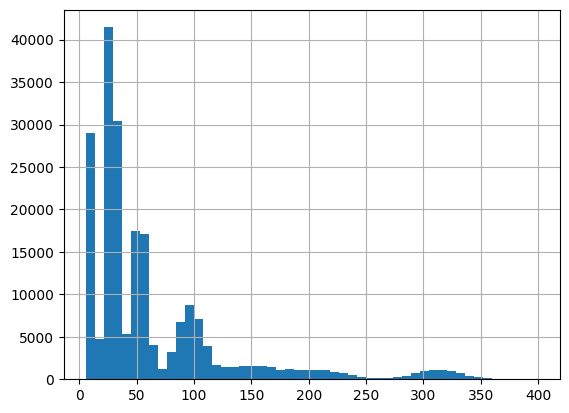

In [49]:
df_4[df_4.prev_address_months_count > -1].prev_address_months_count.hist(bins=50)
plt.show()

Se grafica un histograma de la columna prev_address_months_count sin -1, para poder apreciar mejor la distribución del resto de valores. No se ve que estos sigan una distribución conocida, los valores más frecuentes se dan alrededor de 30, 10, 50 y 90, en ese orden. Después de 100 la frecuencia tiene un descenso casi constante, para luego tener un pequeño monte en torno a 310 aproximadamente. 

#### customer_age

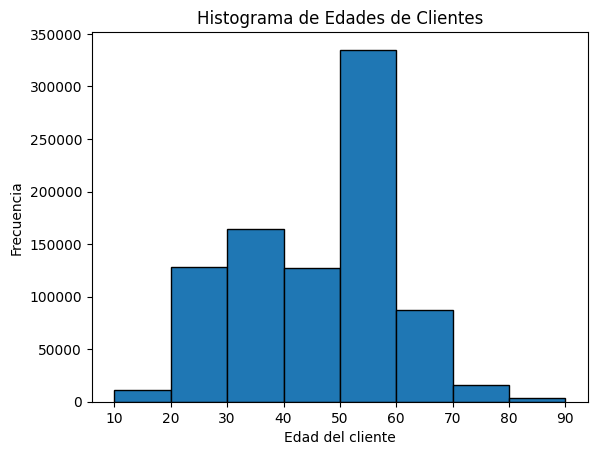

In [48]:
plt.hist(df_4['customer_age'], bins=8, edgecolor='black')

plt.xlabel('Edad del cliente')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades de Clientes')

plt.show()

Dado que no hay valores intermedios entre decadas, este gráfico es muy discontinuo, sin embargo, podría aproximarse a una distribución normal cargadahacia la derecha con la mayor frecuencia entre 50 y 60 años, que es donde las personas logran una estabilidad financiera mayor y mayores ingresos netos.

#### days_since_request

In [50]:
print(len(df_4[df_4.days_since_request < 1])/len(df_4))
print(len(df_4[df_4.days_since_request < 10])/len(df_4))
print(len(df_4[df_4.days_since_request < 20])/len(df_4))

0.9240235713934201
0.9719709168649452
0.9891390307071304


En la columna days_since_request se observa que el 92.4% de sus son menores a 1, el 97.19% menores a 10 y el 98.91% menores a 20. También se sabe que exiten valores superiores a 70 que podrían ser outliers. Tanto 1, como 10 ó 20 podrían usarse de límite para separar outliers, según como se estime conveniente.

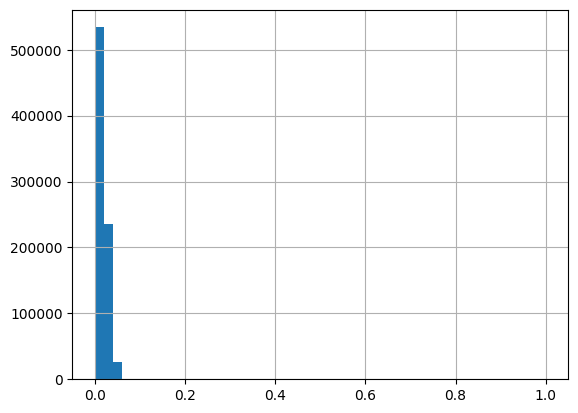

In [51]:
df_4[df_4.days_since_request < 1].days_since_request.hist(bins=50)
plt.show()

In [52]:
print(len(df_4[df_4.days_since_request < 0.1])/len(df_4))
print(len(df_4[df_4.days_since_request < 0.075])/len(df_4))
print(len(df_4[df_4.days_since_request < 0.05])/len(df_4))

0.9101744049642297
0.910095436905093
0.9056537696948056


Se grafica un histograma de days_since_request considerando únicamente los valores menores a 1. En este se observa que la mayoría son menores a 0.1, en concreto un 91% es menor a 0.1 y el 90.5% menor a 0.05, de modo que 0.05, 0.1 y 0.2 podrían ser límites más apropiados que los mencionados anteriormente.

Definir los valores mayores como outliers podría no ser apropiado, dado que estos son un 10% de los datos y con valores dispersos, existe la posibilidad de que estos sean casos menos frecuentes más que anomalías, es decir, podrían aportar valor, sin embargo no se pueden dejar tal como están, puesto que la abrupta diferencia de magnitudes no permite un correcto análisis de los datos. Tres posibles soluciones a este problema serían: transformar la variable a categórica (ej: es o no menor a 0.2), reemplazar todos los casos que superen el límite por un único valor o probar con escala logarítmica.

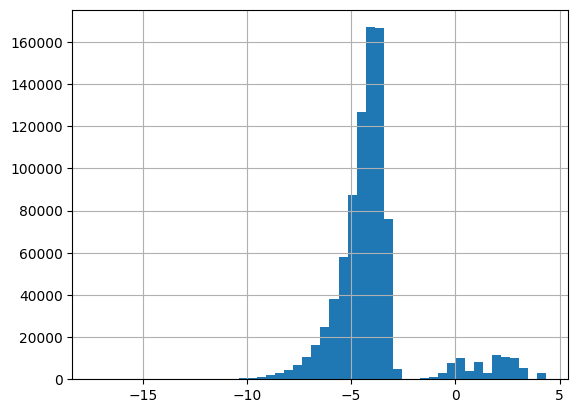

In [53]:
df_4.days_since_request.apply(np.log).hist(bins=50)
plt.show()

In [54]:
print(len(df_4[df_4.days_since_request.apply(np.log) < -10])/len(df_4)*100)
print(len(df_4[df_4.days_since_request.apply(np.log) < -15])/len(df_4)*100)

0.15187045576014768
0.0013733575502048018


Se grafica un histograma de days_since_request en escala logarítmica (base $e$). Se observa una distribución más "manejable" que la normal y también se logra distinguir nuevos outliers; un 0.151% de los datos son menores a $e^{-10}$ y un 0.001% menores a $e^{-15}$.

#### intended_balcon_amount

In [55]:
print(len(df_4[df_4.intended_balcon_amount < -1])/len(df_4))
print(len(df_4[df_4.intended_balcon_amount < 0])/len(df_4))
print(len(df_4[df_4.intended_balcon_amount < 1])/len(df_4))
print(len(df_4[df_4.intended_balcon_amount < 50])/len(df_4))

0.380385707467975
0.7515321520169472
0.7534697306273612
0.9420923788956145


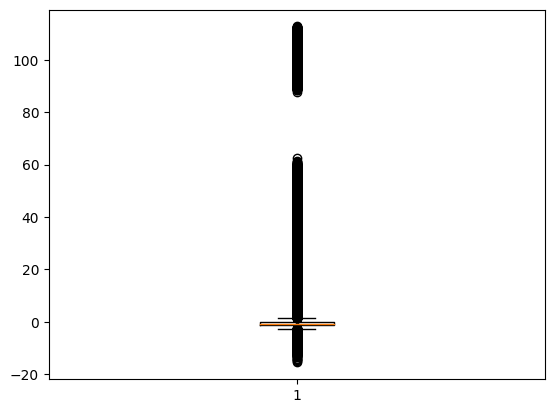

In [56]:
fig, ax = plt.subplots()

ax.boxplot(df_4.intended_balcon_amount)

plt.show()

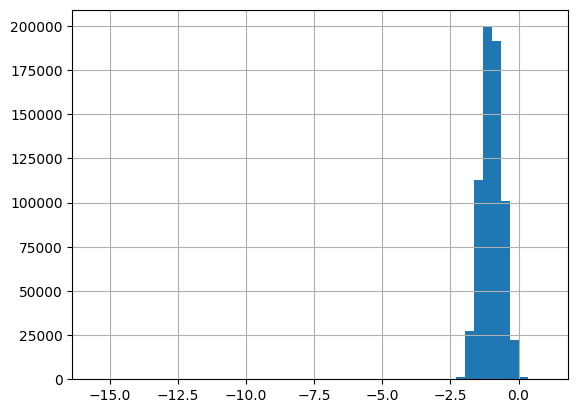

In [57]:
df_4[df_4.intended_balcon_amount < 1].intended_balcon_amount.hist(bins=50)
plt.show()

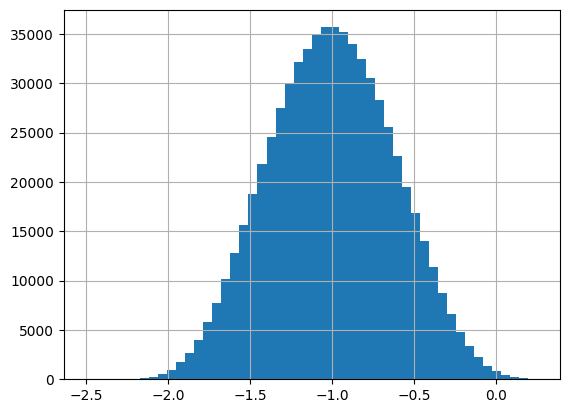

In [64]:
df_4[df_4.intended_balcon_amount.apply(lambda x: -2.5 < x < 0.25)].intended_balcon_amount.hist(bins=50)
plt.show()

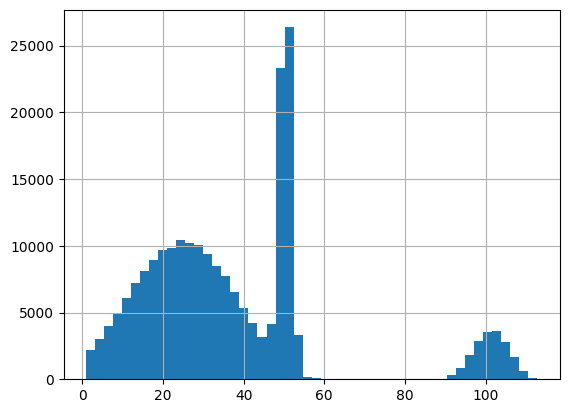

In [59]:
df_4[df_4.intended_balcon_amount > 1].intended_balcon_amount.hist(bins=50)
plt.show()

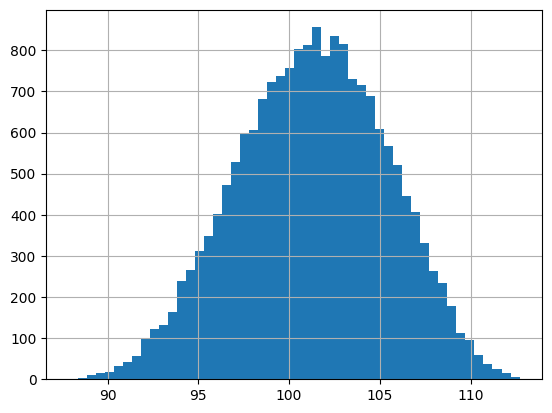

In [60]:
df_4[df_4.intended_balcon_amount.apply(lambda x: 70 < x < 120)].intended_balcon_amount.hist(bins=50)
plt.show()

In [61]:
print(len(df_4[df_4.intended_balcon_amount.apply(lambda x: -2.5 < x < 0.25)])/len(df_4))
print(len(df_4[df_4.intended_balcon_amount.apply(lambda x: 0 < x < 60)])/len(df_4))
print(len(df_4[df_4.intended_balcon_amount.apply(lambda x: 70 < x < 120)])/len(df_4))

0.7511808013770198
0.22749667819142544
0.02095858068075045


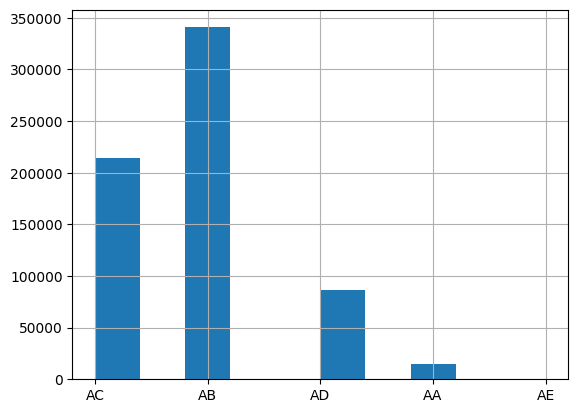

In [62]:
df_4[df_4.intended_balcon_amount.apply(lambda x: -2.5 < x < 0.25)].payment_type.hist()
plt.show()

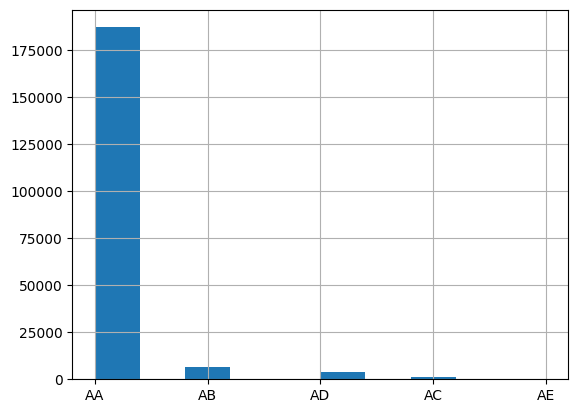

In [65]:
df_4[df_4.intended_balcon_amount.apply(lambda x: 0 < x < 60)].payment_type.hist()
plt.show()

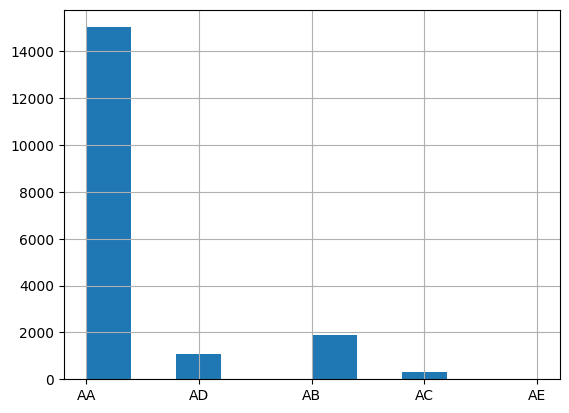

In [66]:
df_4[df_4.intended_balcon_amount.apply(lambda x: 70 < x < 120)].payment_type.hist()
plt.show()

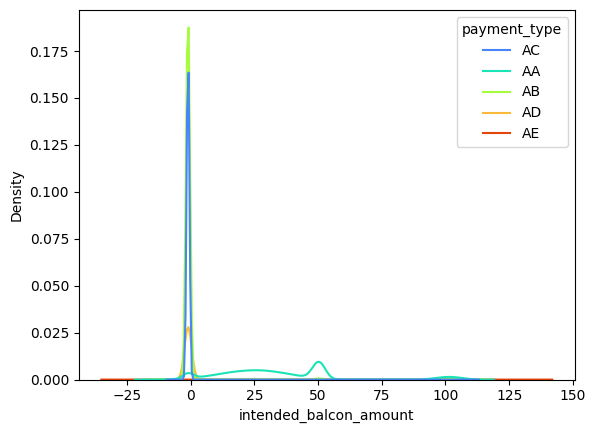

In [67]:
fig, ax = plt.subplots()

ax = sns.kdeplot(data=df_4, x='intended_balcon_amount', hue='payment_type', palette='turbo')

plt.show()

La variable intended_balcon_amount se puede dividir en 3 segmentos, un 75.1% está entre -2.5 y 0.25, un 22.75% entre 0 y 60, y un 2% entre 70 y 120, el resto serían outliers. Los 3 segmentos muestran una distribución que aproxima a la normal, con medias alrededor de -1, 25 y 103 respectivamente, salvo el segundo segmento que además tiene una alta concentración de valores cercanos a 50.

La variable con la que más correlaciona, además de la única destacable, es payment_type, y se observa que en el primer segmento la clase más común es AB, mientras que los otros 2 están dominados por AA, sin embargo no hay suficiente correlación como para que los segmentos sean separables por esta variable.

Los dos segmentos menores tienen magnitudes comparables, pero una gran diferencia con el segento de mayor frecuencia, lo caul supone un problema al momento de pasarle los datos a un modelo.

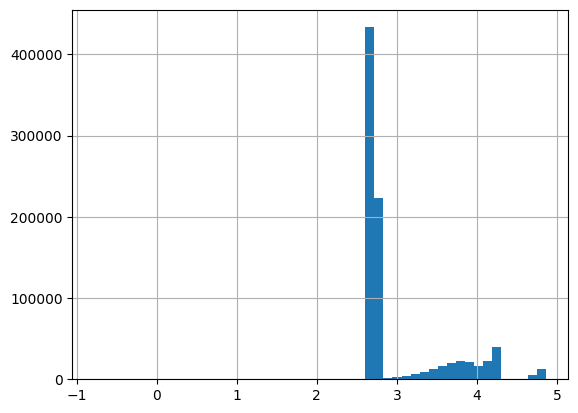

In [78]:
df_4.intended_balcon_amount.apply(lambda x: np.log(x+16)).hist(bins=50)
plt.show()

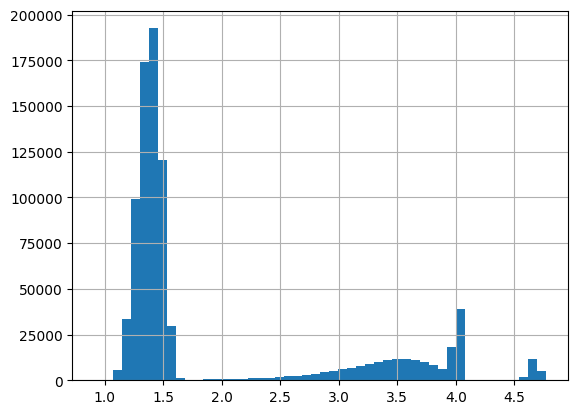

In [75]:
df_4[df_4.intended_balcon_amount > -2.5].intended_balcon_amount.apply(lambda x: np.log(x+5)).hist(bins=50)
plt.show()

In [76]:
print(len(df_4[df_4.intended_balcon_amount < -2.5])/len(df_4)*100)

0.16205619092416662


Eliminando un 0.16% de outliers por la izquierda y aplicando logaritmo se puede atenuar la diferencia de magnitud.

#### bank_branch_count_8w

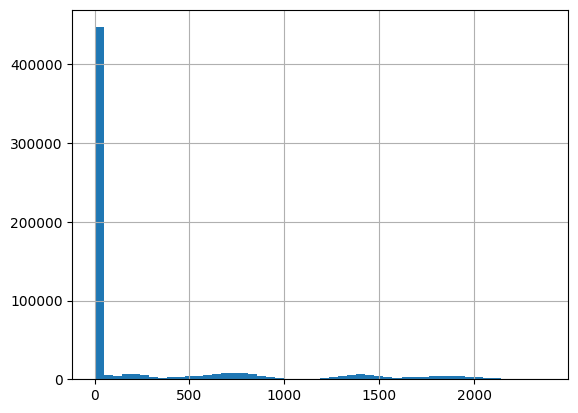

In [ ]:
df_4[df_4.bank_branch_count_8w > 1].bank_branch_count_8w.hist(bins=50)
plt.show()

In [ ]:
print(len(df_4[df_4.bank_branch_count_8w <= 1])/len(df_4))
print(len(df_4[df_4.bank_branch_count_8w <= 2])/len(df_4))
print(len(df_4[df_4.bank_branch_count_8w <= 5])/len(df_4))
print(len(df_4[df_4.bank_branch_count_8w <= 10])/len(df_4))
print(len(df_4[df_4.bank_branch_count_8w <= 50])/len(df_4))

0.2912845585399378
0.3497827233909113
0.3949719091157752
0.5189403173142619
0.8038284630641209


In [ ]:
print(len(df_4[df_4.bank_branch_count_8w.apply(lambda x: 10 < x <= 50)])/len(df_4))
print(len(df_4[df_4.bank_branch_count_8w.apply(lambda x: 500 < x < 1000)])/len(df_4))
print(len(df_4[df_4.bank_branch_count_8w.apply(lambda x: 1000 < x)])/len(df_4))

0.28488814574985893
0.06642358238028041
0.08209130309886686


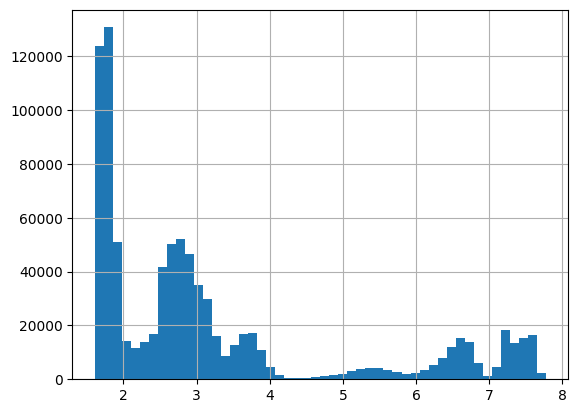

In [105]:
df_4[df_4.bank_branch_count_8w >=0].bank_branch_count_8w.apply(lambda x: np.log(x+5)).hist(bins=50)
plt.show()

Nuevamente se opina que en este caso una escala logaritmica haría la gran diferencia de magnitudes mucho mas manejable

#### Credit risk score

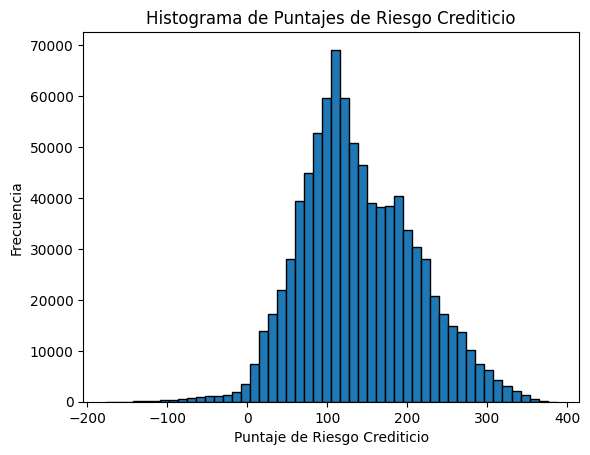

In [108]:
# Supongamos que tienes una columna llamada "credit_risk_score" en tu DataFrame llamado "df"
plt.hist(df_4['credit_risk_score'], bins=50, edgecolor='black')

plt.xlabel('Puntaje de Riesgo Crediticio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Puntajes de Riesgo Crediticio')

plt.show()


Dsitribución bastante similar a una normal

#### Correlaciones

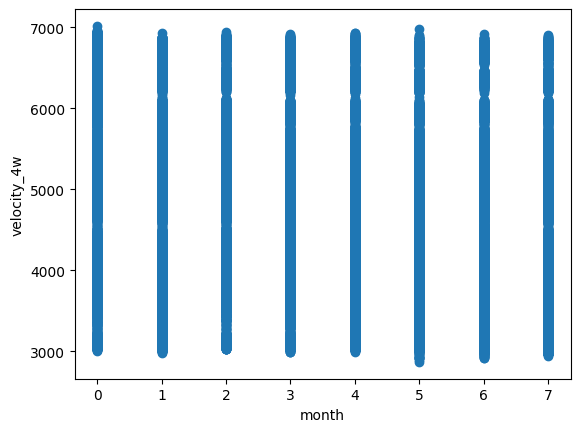

In [ ]:
fig, ax = plt.subplots()

ax.scatter(df_4.month, df_4.velocity_4w)
ax.set_xlabel('month')
ax.set_ylabel('velocity_4w')

plt.show()

In [ ]:
df_4[['month', 'velocity_4w']].groupby('month').apply(lambda x: np.mean(x, axis=0))

month  velocity_4w
month                    
0        0.0  6181.688589
1        1.0  5385.679343
2        2.0  5358.629008
3        3.0  4917.932780
4        4.0  4643.394285
5        5.0  4289.963969
6        6.0  4129.917753
7        7.0  3376.788555

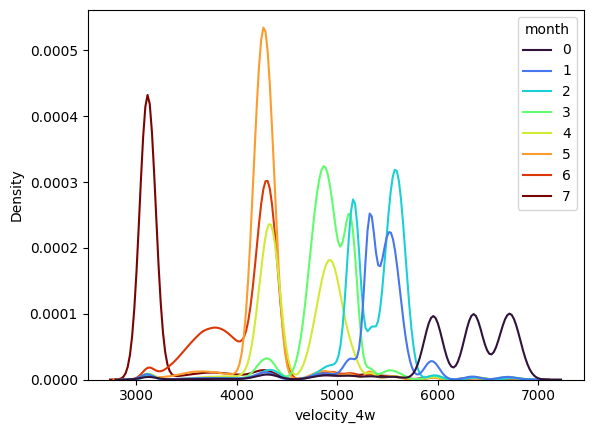

In [ ]:
fig, ax = plt.subplots()

ax = sns.kdeplot(data=df_4, x='velocity_4w', hue='month', palette='turbo')

plt.show()

Se observa que la media de velocity_4w disminuye a medida que aumenta el mes, pero también que existe un solapamiento considerable entre los valores de la variable en distintos meses, de modo que no sería razonable pretender prescindir de alguna de las 2 en base a su correlación.

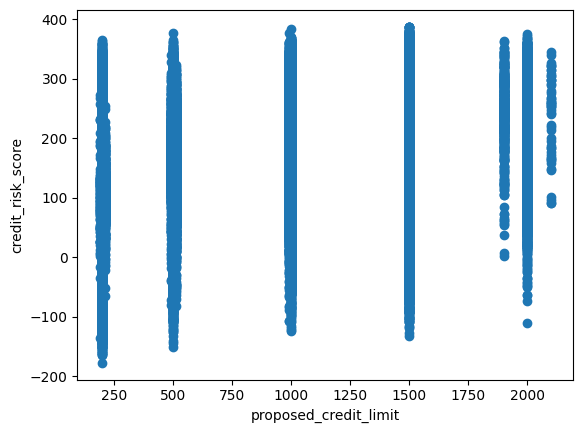

In [ ]:
fig, ax = plt.subplots()

ax.scatter(df_4.proposed_credit_limit, df_4.credit_risk_score)
ax.set_xlabel('proposed_credit_limit')
ax.set_ylabel('credit_risk_score')

plt.show()

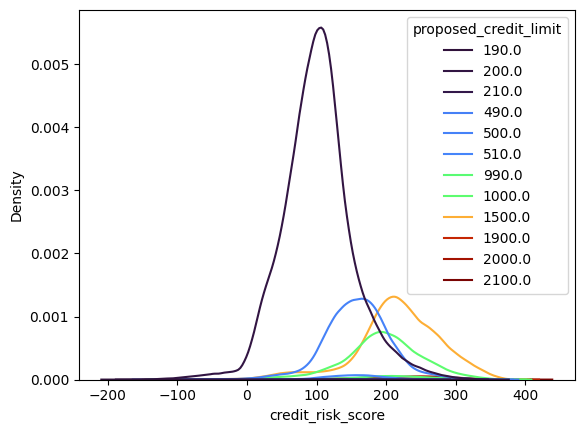

In [ ]:
fig, ax = plt.subplots()

ax = sns.kdeplot(data=df_4, x='credit_risk_score', hue='proposed_credit_limit', palette='turbo')

plt.show()

La relación entre credit_risk_score y density es similar a la de month con velocity_4w, con medias diferenciadas y solape entre categorías.

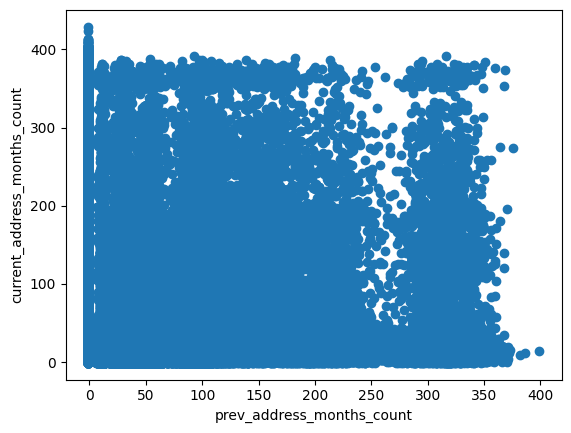

In [ ]:
fig, ax = plt.subplots()

ax.scatter(df_4.prev_address_months_count, df_4.current_address_months_count)
ax.set_xlabel('prev_address_months_count')
ax.set_ylabel('current_address_months_count')

plt.show()

Por medio del scatter plot no se observa ninguna relación relevante entre "prev_address_months_count" y "current_address_months_count", salvo un descenso general de "current_address_months_count" para valores de "prev_address_months_count" cercanos a 260.

## 4. Preprocesamiento

### 4.1 Declarar `ColumnTransformer`

Se normalizan las variables del dataset para que estas tengan magnitudes comparables. En un principio las columnas se dividen para ser normalizadas con `MinMaxScaler`, `StandardScaler`, `RobustScaler` o no ser modificadas, sin embargo posteriormente se observó que funciona mejor utilizar únicamente `MinMaxScaler`, esto puede ser debido a que `RobustScaler` amortigua el efecto de los outliers, lo que puede ser contraproducente suando se quieren encontrar anomalías, además llevar todas las variables a la misma distribución dificulta distinguir entre distintos grupos. Por este motivo se normaliza el dataset con `MinMaxScaler` a escala de 0 a 1, salvo por las columnas que ya se encontraban en una escala cercana.

Antes de normalizar lo datos las variables 'intended_balcon_amount' y 'days_since_request' se pasan a escala logarítmica para facilitar su distinción. Por simplicidad se excluyen las variables categóricas 'payment_type', 'employment_status', 'housing_status' y 'device_os', debido a que para incluir estas variables por medio de onehot se tendrían que agrgar entre 2 y 6 columnas nuevas por cada una. Asignar un valor entero a cada categoría no es una buena opción, dado que induce un orden y distancias desiguales donde no los hay. La variable 'id' no sirve para nada, pero por motivos desconocidos se deja en el dataset.

In [112]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler, FunctionTransformer, RobustScaler

In [113]:
dfp = df_4[df_4.intended_balcon_amount > -2.5].copy()

In [114]:
x = StandardScaler().fit_transform(dfp[dfp.prev_address_months_count > -1].prev_address_months_count.to_numpy().reshape((207355, 1)))
dfp.loc[dfp[dfp.prev_address_months_count > -1].prev_address_months_count.index, 'prev_address_months_count'] = (x + 1).reshape(207355)
dfp['log_intended_balcon_amount'] = dfp.intended_balcon_amount.apply(lambda x: np.log(x+5))
dfp['log_days_since_request'] = dfp.days_since_request.apply(np.log)
dfp.source = dfp.source.apply(lambda x: {True: 1, False: 0}[x == 'INTERNET'])

linea 1.  Para evitar introducir información incorrecta o distorsionada en la transformación de escalado, se decide excluir esos valores del cálculo.

linea 2. Se actualiza la columna prev_address_months_count del DataFrame dfp

linea 3.  Se crea una nueva columna llamada log_intended_balcon_amount en el DataFrame dfp. Esta columna se calcula aplicando la función np.log al valor de la columna intended_balcon_amount, al que se le suma 5 antes de aplicar el logaritmo. Esto se hace para evitar errores cuando el valor de intended_balcon_amount es 0 o negativo.

linea 4. Se crea una nueva columna llamada log_days_since_request en el DataFrame dfp. Esta columna se calcula aplicando la función np.log al valor de la columna days_since_request.

linea 5. La columna source del DataFrame dfp se actualiza asignando 1 si el valor es igual a 'INTERNET' y 0 en caso contrario. Esto se realiza utilizando una función lambda y un diccionario de asignación de valores.

In [115]:
minmax_vars = ['current_address_months_count', 'bank_months_count', 'proposed_credit_limit', 'month', 'bank_branch_count_8w']
std_vars = ['customer_age', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'credit_risk_score']
robust_vars = ['log_days_since_request', 'session_length_in_minutes',
               'date_of_birth_distinct_emails_4w']
id_vars = ['fraud_bool', 'segmentacion_etaria', 'id', 'income', 'prev_address_months_count',
           'log_intended_balcon_amount', 'has_other_cards', 'foreign_request',
           'keep_alive_session', 'x1', 'x2', 'name_email_similarity', 'email_is_free',
           'device_distinct_emails_8w', 'phone_home_valid', 'phone_mobile_valid', 'source']

ct = ColumnTransformer([
    ('identity', 'passthrough', id_vars),
    ('minmax', MinMaxScaler(), minmax_vars),
    ('standar', MinMaxScaler(), std_vars),
    ('robust', MinMaxScaler(), robust_vars)
], verbose_feature_names_out=False)

ct.set_output(transform='pandas')

ColumnTransformer(transformers=[('identity', 'passthrough',
                                 ['fraud_bool', 'segmentacion_etaria', 'id',
                                  'income', 'prev_address_months_count',
                                  'log_intended_balcon_amount',
                                  'has_other_cards', 'foreign_request',
                                  'keep_alive_session', 'x1', 'x2',
                                  'name_email_similarity', 'email_is_free',
                                  'device_distinct_emails_8w',
                                  'phone_home_valid', 'phone_mobile_valid',
                                  'source'])...
                                 ['current_address_months_count',
                                  'bank_months_count', 'proposed_credit_limit',
                                  'month', 'bank_branch_count_8w']),
                                ('standar', MinMaxScaler(),
                                 ['customer_age', 'zip_count_4w', 'velocity_6h',
                                  'velocity_24h', 'velocity_4w',
                                  'credit_risk_score']),
                                ('robust', MinMaxScaler(),
                                 ['log_days_since_request',
                                  'session_length_in_minutes',
                                  'date_of_birth_distinct_emails_4w'])],
                  verbose_feature_names_out=False)

### 4.2 Transformar datos

In [116]:
dfp = ct.fit_transform(dfp).reset_index()
del dfp['index']

In [118]:
dfp

fraud_bool segmentacion_etaria      id  income  \
0                0       Persona Mayor  729517     0.7   
1                0              Adulto  149585     0.8   
2                0              Adulto   64486     0.9   
3                0              Adulto  825283     0.5   
4                0              Adulto    8308     0.9   
...            ...                 ...     ...     ...   
872350           0       Persona Mayor  707063     0.1   
872351           0              Adulto  784606     0.5   
872352           0              Adulto  216375     0.8   
872353           0              Adulto   41856     0.7   
872354           0              Adulto  988191     0.9   

        prev_address_months_count  log_intended_balcon_amount  \
0                       -1.000000                    1.223936   
1                       -1.000000                    2.191876   
2                       -1.000000                    3.501338   
3                       -1.000000                    1.305492   
4                       -1.000000                    1.266674   
...                           ...                         ...   
872350                  -1.000000                    1.484488   
872351                  -1.000000                    1.321867   
872352                   0.718051                    1.530233   
872353                   0.404205                    2.737086   
872354                  -1.000000                    1.360174   

        has_other_cards  foreign_request  keep_alive_session        x1  ...  \
0                     0                0                   0 -0.245425  ...   
1                     1                0                   1  0.009336  ...   
2                     1                0                   1  2.229616  ...   
3                     0                0                   1 -0.193945  ...   
4                     1                0                   1 -2.440650  ...   
...                 ...              ...                 ...       ...  ...   
872350                0                0                   0  0.397897  ...   
872351                1                0                   1  1.713050  ...   
872352                1                0                   0 -0.727536  ...   
872353                0                0                   1  1.642429  ...   
872354                1                0                   0 -1.662247  ...   

        bank_branch_count_8w  customer_age  zip_count_4w  velocity_6h  \
0                   0.000421         0.625      0.148744     0.325726   
1                   0.675221         0.500      0.190705     0.178295   
2                   0.007152         0.500      0.666115     0.356084   
3                   0.366849         0.250      0.255226     0.479213   
4                   0.000421         0.250      0.085426     0.321523   
...                      ...           ...           ...          ...   
872350              0.000841         0.625      0.269815     0.166647   
872351              0.002103         0.500      0.156114     0.784526   
872352              0.004207         0.250      0.137915     0.116869   
872353              0.003786         0.250      0.178523     0.282590   
872354              0.017669         0.250      0.288916     0.164376   

        velocity_24h  velocity_4w  credit_risk_score  log_days_since_request  \
0           0.319281     0.641424           0.574468                0.637297   
1           0.178593     0.065214           0.500000                0.607138   
2           0.351430     0.588786           0.682624                0.495781   
3           0.443088     0.530176           0.558511                0.632831   
4           0.517414     0.496832           0.508865                0.590574   
...              ...          ...                ...                     ...   
872350      0.226808     0.343421           0.641844                0.630629   
872351      0.807746     0.624918           0.627660            

## 5. Visualización en Baja Dimensionalidad

Se proyectan los datos a 2 dimensiones por medio de PCA y UMAP, luego se grafican las proyecciones, separadas según segmentaión etaria y coloreando 'fraud_bool'. En las proyecciones de PCA se distinguen 2 clusters, para los 4 segmentos, y no es posible distinguir los casos de fraude del resto.

### 5.1 Muestrear dataframe

In [119]:
np.random.seed(0)
sample_idx = np.random.choice(dfp.index.to_numpy(), size=20000, replace=False)
sdf = dfp.iloc[sample_idx].copy()

In [120]:
sdf

fraud_bool segmentacion_etaria      id  income  \
433483           0       Persona Mayor  478157     0.9   
231229           0              Adulto  466246     0.9   
776966           0              Adulto  611966     0.5   
775690           0              Adulto  211646     0.5   
576879           0        Adulto-Joven  347215     0.1   
...            ...                 ...     ...     ...   
466595           0        Adulto-Joven  581881     0.4   
847704           0              Adulto  838496     0.8   
83550            0              Adulto   19458     0.8   
133560           0       Persona Mayor  123338     0.9   
125409           0        Adulto-Joven  515652     0.7   

        prev_address_months_count  log_intended_balcon_amount  \
433483                   -1.00000                    4.030747   
231229                   -1.00000                    2.911012   
776966                   -1.00000                    3.485745   
775690                   -1.00000                    1.534007   
576879                   -1.00000                    1.256014   
...                           ...                         ...   
466595                   -1.00000                    3.984258   
847704                    0.44904                    1.317904   
83550                    -1.00000                    1.370851   
133560                   -1.00000                    1.524101   
125409                   -1.00000                    4.006031   

        has_other_cards  foreign_request  keep_alive_session        x1  ...  \
433483                0                0                   1 -0.449500  ...   
231229                0                0                   0 -1.499670  ...   
776966                1                0                   0 -0.631575  ...   
775690                0                0                   1 -0.943091  ...   
576879                0                0                   0  1.364510  ...   
...                 ...              ...                 ...       ...  ...   
466595                0                0                   1 -0.434036  ...   
847704                1                0                   0  0.879315  ...   
83550                 1                0                   0 -1.108683  ...   
133560                1                0                   1  1.270377  ...   
125409                0                0                   1  0.266934  ...   

        bank_branch_count_8w  customer_age  zip_count_4w  velocity_6h  \
433483              0.010097         0.625      0.375244     0.427571   
231229              0.010097         0.250      0.249962     0.413810   
776966              0.016407         0.500      0.133404     0.219119   
775690              0.005469         0.500      0.405324     0.366476   
576879              0.000421         0.125      0.249812     0.274327   
...                      ...           ...           ...          ...   
466595              0.628103         0.125      0.117160     0.239218   
847704              0.111485         0.500      0.486840     0.377336   
83550               0.007152         0.375      0.167694     0.042849   
133560              0.003366         0.625      0.211912     0.275354   
125409              0.002524         0.125      0.118063     0.703413   

        velocity_24h  velocity_4w  credit_risk_score  log_days_since_request  \
433483      0.506307     0.545955           0.512411                0.601055   
231229      0.415367     0.368661           0.579787                0.930739   
776966      0.162425     0.324791           0.553191                0.575442   
775690      0.381522     0.340795           0.508865                0.800970   
576879      0.260262     0.546097           0.521277                0.934425   
...              ...          ...                ...                     ...   
466595      0.196311     0.330757           0.537234                0.633109   
847704      0.365760     0.479467           0.593972            

In [138]:
sdf.describe()

fraud_bool             id        income  prev_address_months_count  \
count  20000.000000   20000.000000  20000.000000               20000.000000   
mean       0.012700  496141.359150      0.580845                  -0.529924   
std        0.111979  287405.300524      0.287961                   0.966996   
min        0.000000       8.000000      0.100000                  -1.000000   
25%        0.000000  247905.750000      0.300000                  -1.000000   
50%        0.000000  494773.000000      0.700000                  -1.000000   
75%        0.000000  744139.000000      0.800000                  -1.000000   
max        1.000000  999923.000000      0.900000                   5.560253   

       log_intended_balcon_amount  has_other_cards  foreign_request  \
count                20000.000000     20000.000000     20000.000000   
mean                     1.939328         0.247850         0.023100   
std                      1.010965         0.431775         0.150225   
min                      0.934128         0.000000         0.000000   
25%                      1.341119         0.000000         0.000000   
50%                      1.427787         0.000000         0.000000   
75%                      1.738158         0.000000         0.000000   
max                      4.750380         1.000000         1.000000   

       keep_alive_session            x1            x2  ...  \
count        20000.000000  20000.000000  20000.000000  ...   
mean             0.554950      0.019745      0.005612  ...   
std              0.496984      1.021736      1.010297  ...   
min              0.000000     -3.831981     -4.114156  ...   
25%              0.000000     -0.666915     -0.668435  ...   
50%              1.000000      0.013576      0.008170  ...   
75%              1.000000      0.700319      0.666080  ...   
max              1.000000      4.957455      4.665799  ...   

       bank_branch_count_8w  customer_age  zip_count_4w   velocity_6h  \
count          20000.000000  20000.000000  20000.000000  20000.000000   
mean               0.085603      0.392150      0.226449      0.335868   
std                0.201558      0.172444      0.143804      0.173498   
min                0.000000      0.000000      0.000301      0.012928   
25%                0.000421      0.250000      0.132952      0.209037   
50%                0.004207      0.500000      0.181080      0.318620   
75%                0.013042      0.500000      0.275380      0.445943   
max                0.990745      1.000000      0.953076      0.999955   

       velocity_24h   velocity_4w  credit_risk_score  log_days_since_request  \
count  20000.000000  20000.000000       20000.000000            20000.000000   
mean       0.408125      0.449649           0.560295                0.615876   
std        0.176624      0.210095           0.126808                0.095422   
min        0.022525      0.026387           0.042553                0.148102   
25%        0.266502      0.329261           0.471631                0.572864   
50%        0.406361      0.468703           0.542553                0.607446   
75%        0.520929      0.592878           0.647163                0.632618   
max        0.984243      0.989999           0.969858                0.999161   

       session_length_in_minutes  date_of_birth_distinct_emails_4w  
count               20000.000000                      20000.000000  
mean                    0.102186                          0.199067  
std                     0.095642                          0.123567  
min                     0.000000                          0.000000  
25%                     0.048041                          0.102564  
50%                     0.072189                          0.179487  
75%                     0.120058                          0.282051  
max                     0.873048                          0.871795  

[8 rows x 30 columns]

### 5.2 Proyectar y agregar proyecciones al dataframe de muestreo

#### Proyección PCA

In [122]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.set_output(transform='pandas')

PCA(n_components=2)

In [123]:
numcols = list(set(sdf.columns) - set(['segmentacion_etaria', 'id', 'fraud_bool']))
spca = pca.fit_transform(sdf[numcols])

In [178]:
spca

pca0      pca1 fraud_bool
433483 -1.632601  1.630064          0
231229 -0.578351  0.363200          0
776966 -1.062546  1.176993          0
775690 -1.280423 -0.779811          0
576879  0.454929  0.111646          0
...          ...       ...        ...
466595 -0.334337  1.653974          0
847704  1.379340 -0.195649          0
83550  -1.044167 -0.863032          0
133560  1.868669  0.510370          0
125409 -0.361185  1.966834          0

[20000 rows x 3 columns]

#### Proyección umap

In [126]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=44907dfb7210225e93a0319727fbfc7facb8ff1617f9b5c8d0d288c09a36e734
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=72990f809ee093add41212e4fade0419557ade09673af9d3091a56be9451f8e7
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [136]:
# Crear el objeto UMAP y realizar la proyección
import umap
umap_model = umap.UMAP(n_components=2)
umap_projection = umap_model.fit_transform(sdf[numcols])

In [184]:
umap_df = pd.DataFrame(umap_projection, columns=['umap0', 'umap1'], index=sdf.index)
umap_df['fraud_bool'] = sdf['fraud_bool'].astype(str)

In [185]:
umap_df

umap0      umap1 fraud_bool
433483   2.297526   0.378890          0
231229   2.715712  -2.962870          0
776966   2.159359  -2.608439          0
775690  -7.766665  11.991407          0
576879   1.777061  17.361427          0
...           ...        ...        ...
466595   1.015266  -0.938519          0
847704  12.059848   9.561510          0
83550    3.891168   8.544093          0
133560  -0.179382   9.305985          0
125409   1.078907  -0.762443          0

[20000 rows x 3 columns]

In [181]:
type(umap_df)

pandas.core.frame.DataFrame

In [182]:
umap_df

umap0      umap1 fraud_bool
433483   2.297526   0.378890          0
231229   2.715712  -2.962870          0
776966   2.159359  -2.608439          0
775690  -7.766665  11.991407          0
576879   1.777061  17.361427          0
...           ...        ...        ...
466595   1.015266  -0.938519          0
847704  12.059848   9.561510          0
83550    3.891168   8.544093          0
133560  -0.179382   9.305985          0
125409   1.078907  -0.762443          0

[20000 rows x 3 columns]

### 5.3 Visualizar según rangos etarios

#### Usando pca

In [129]:
!pip install --upgrade plotly
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 81.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [149]:
spca

pca0      pca1 fraud_bool
433483 -1.632601  1.630064          0
231229 -0.578351  0.363200          0
776966 -1.062546  1.176993          0
775690 -1.280423 -0.779811          0
576879  0.454929  0.111646          0
...          ...       ...        ...
466595 -0.334337  1.653974          0
847704  1.379340 -0.195649          0
83550  -1.044167 -0.863032          0
133560  1.868669  0.510370          0
125409 -0.361185  1.966834          0

[20000 rows x 3 columns]

In [186]:
spca['fraud_bool'] = sdf['fraud_bool'].astype(str)
fig = px.scatter(spca[sdf.segmentacion_etaria == 'Joven'], x='pca0', y='pca1', color='fraud_bool', title='Proyección PCA | Joven')
fig.show()

En este caso son pocos los caso, a primera vista son 3 los casos de fraude y efectivamente están lejanos a la concentración de los datos, sin embargo, no son los unicos puntos que se alejan, por tanto sería interesante poder establecer una medida de distancia, extraer los puntos que se alejan mas de un umbral de las concentraciones principales, y hacer un analisis mas exhaustivo en estos casos de posibles fraudes, por tanto, se cconsidera este resultado exitoso

In [193]:
fig = px.scatter(spca[sdf.segmentacion_etaria == 'Adulto-Joven'], x='pca0', y='pca1', color='fraud_bool', title='Proyección PCA | Adulto-Joven')
fig.show()

En este caso nuevamente los casos de fraude están a la orilla de las concentraciones principales, sin embargo, no necesariamente están fuera de estas, por tanto, aunque muchos de los casos de fraudes se podrían detectar, dependiendo de la metrica para extraer los casos de posibles fraudes, podrían hacer algunaos casos de omisión.

In [194]:
fig = px.scatter(spca[sdf.segmentacion_etaria == 'Adulto'], x='pca0', y='pca1', color='fraud_bool', title='Proyección PCA | Adulto')
fig.show()

En esta figura se hace todavía mas complejo distinguir los fraudes de las concentraciones principales, donde a pesar de poder detectar una gran cantidad de estos, habrían bastantes que probablemente se pasarían por alto.

In [195]:
fig = px.scatter(spca[sdf.segmentacion_etaria == 'Persona Mayor'], x='pca0', y='pca1', color='fraud_bool', title='Proyección PCA | Persona Mayor')
fig.show()

En este caso, la matpria de los casos de fraude pasaría desapercibido, por tanto sería interesante hacer un procesmaiento y analisis distinto para este grupo etario (quizas uno totalmente distinto para cada grupo etario).

#### Visualizaciones umap

In [188]:
umap_df['fraud_bool'] = sdf['fraud_bool'].astype(str)
fig_umap = px.scatter(umap_df[sdf.segmentacion_etaria == 'Joven'], x='umap0', y='umap1', color='fraud_bool', title='Proyección UMAP | Joven')
fig_umap.show()

Análogamente al caso de pca, en este grupo etario todos los fraudes serían probablemente detectados, pero según la metrica de distancia podrían detectarse casos no fraudulentos como fraudulentos, por tanto, debe hacerse un analisis a cada caso detectado como posible fraude.

In [196]:
fig_umap = px.scatter(umap_df[sdf.segmentacion_etaria == 'Adulto-Joven'], x='umap0', y='umap1', color='fraud_bool', title='Proyección UMAP | Joven_Adulto')
fig_umap.show()

Análogo al caso de pca, pero claramente existen mas concentraciones como en el caso anterior, pudiendose pasar por alto algún caso de fraude dependiendo de la métrica de distancia.

In [197]:
fig_umap = px.scatter(umap_df[sdf.segmentacion_etaria == 'Adulto'], x='umap0', y='umap1', color='fraud_bool', title='Proyección UMAP | Adulto')
fig_umap.show()

Al igual que con pca, en este caso habrían mas omisiones de casos de fraude.

In [206]:
fig_umap = px.scatter(umap_df[sdf.segmentacion_etaria == 'Persona Mayor'], x='umap0', y='umap1', color='fraud_bool', title='Proyección UMAP | Joven')
fig_umap.show()

Aquí nuevamente habrían varios casos de fraude omitidos y sería necesario hacer un procesamiento y analisis especial para estos grupos etarios.

## 6. Anomalías

Para detectar anomalías se emplean los modelos isolation forest y DBSCAN. Los modelos se aplican por separado a cada segmento etario y luego se visualizan sus resultados en scatter plots de las proyecciones 2D.

### 6.1 Implementar detector de anomalías sobre dataframe de muestreo

In [198]:
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN

In [199]:
isof_p_j = IsolationForest().fit_predict(sdf[sdf['segmentacion_etaria']=='Joven'][numcols])
isof_p_aj = IsolationForest().fit_predict(sdf[sdf['segmentacion_etaria']=='Adulto-Joven'][numcols])
isof_p_a = IsolationForest().fit_predict(sdf[sdf['segmentacion_etaria']=='Adulto'][numcols])
isof_p_pm = IsolationForest().fit_predict(sdf[sdf['segmentacion_etaria']=='Persona Mayor'][numcols])

In [205]:
db_j = DBSCAN(eps=1.8, min_samples=4).fit_predict(sdf[sdf['segmentacion_etaria']=='Joven'][numcols])
db_aj = DBSCAN(eps=1.3, min_samples=7).fit_predict(sdf[sdf['segmentacion_etaria']=='Adulto-Joven'][numcols])
db_a = DBSCAN(eps=1.1, min_samples=3).fit_predict(sdf[sdf['segmentacion_etaria']=='Adulto'][numcols])
db_pm = DBSCAN(eps=1.3, min_samples=3).fit_predict(sdf[sdf['segmentacion_etaria']=='Persona Mayor'][numcols])

### 6.2 Agregar resultados a dataframe de muestreo

In [204]:
sdf['iso_anomalies'] = np.zeros(len(sdf))
sdf.loc[sdf['segmentacion_etaria']=='Joven', 'iso_anomalies'] = isof_p_j
sdf.loc[sdf['segmentacion_etaria']=='Adulto-Joven', 'iso_anomalies'] = isof_p_aj
sdf.loc[sdf['segmentacion_etaria']=='Adulto', 'iso_anomalies'] = isof_p_a
sdf.loc[sdf['segmentacion_etaria']=='Persona Mayor', 'iso_anomalies'] = isof_p_pm
sdf.iso_anomalies = sdf.iso_anomalies.apply(lambda x: {True: 'Anomaly', False: 'Normal'}[x==-1])

spca['iso_anomalies'] = sdf.iso_anomalies

In [202]:
sdf['db_anomalies'] = np.zeros(len(sdf))
sdf.loc[sdf['segmentacion_etaria']=='Joven', 'db_anomalies'] = db_j
sdf.loc[sdf['segmentacion_etaria']=='Adulto-Joven', 'db_anomalies'] = db_aj
sdf.loc[sdf['segmentacion_etaria']=='Adulto', 'db_anomalies'] = db_a
sdf.loc[sdf['segmentacion_etaria']=='Persona Mayor', 'db_anomalies'] = db_pm
sdf.db_anomalies = sdf.db_anomalies.apply(lambda x: {True: 'Anomaly', False: 'Normal'}[x==-1])

spca['db_anomalies'] = sdf.db_anomalies

### 6.3 Visualizar según rangos etarios

**Isolation Forest:**

In [207]:
fig = px.scatter(spca[sdf.segmentacion_etaria == 'Joven'], x='pca0', y='pca1', color='iso_anomalies',
                 title='Proyección PCA | Anomalías por Isolation Forest | Joven')
fig.show()

In [208]:
fig = px.scatter(spca[sdf.segmentacion_etaria == 'Adulto-Joven'], x='pca0', y='pca1', color='iso_anomalies',
                 title='Proyección PCA | Anomalías por Isolation Forest | Adulto-Joven')
fig.show()

In [209]:
fig = px.scatter(spca[sdf.segmentacion_etaria == 'Adulto'], x='pca0', y='pca1', color='iso_anomalies',
                 title='Proyección PCA | Anomalías por Isolation Forest | Adulto')
fig.show()

In [210]:
fig = px.scatter(spca[sdf.segmentacion_etaria == 'Persona Mayor'], x='pca0', y='pca1', color='iso_anomalies',
                 title='Proyección PCA | Anomalías por Isolation Forest | Persona Mayor')
fig.show()

**Anomalías por DBSCAN:**

In [ ]:
fig = px.scatter(spca[sdf.segmentacion_etaria == 'Joven'], x='pca0', y='pca1', color='db_anomalies',
                 title='Proyección PCA | Anomalías por DBSCAN | Joven')
fig.show()

In [ ]:
fig = px.scatter(spca[sdf.segmentacion_etaria == 'Adulto-Joven'], x='pca0', y='pca1', color='db_anomalies',
                 title='Proyección PCA | Anomalías por DBSCAN | Adulto-Joven')
fig.show()

In [ ]:
fig = px.scatter(spca[sdf.segmentacion_etaria == 'Adulto'], x='pca0', y='pca1', color='db_anomalies',
                 title='Proyección PCA | Anomalías por DBSCAN | Adulto')
fig.show()

In [ ]:
fig = px.scatter(spca[sdf.segmentacion_etaria == 'Persona Mayor'], x='pca0', y='pca1', color='db_anomalies',
                 title='Proyección PCA | Anomalías por DBSCAN | Persona Mayor')
fig.show()

### 6.4 Calcular ratios y responder

Para DBSCAN se realizó un sweep de hiper-parámetros, sobre los 4 segmentos etarios, donde se obtuvieron las matrices mostradas a continuación. En estas se puede ver que, como era de esperar, el modelo se comporta distinto en los 4 casos, logrando su mejor desempeño en el segmento adulto-joven, donde puede encontrar el 91% de los fraudes a costo de un 36% de falsos positivos (lo que sigue siendo un mal resultado), y el peor en el segmento persona mayor, donde es incapaz de distinguir fraude de casos normales (TPR $≈$ FPR).

In [212]:
def tpfp(df, e_array=np.arange(0.5, 2, 0.1), s_array=np.arange(3, 11)):
    tp = []
    fp = []
    for e in e_array:
        fpi = []
        tpi = []
        for s in s_array:
            dbi = DBSCAN(eps=e, min_samples=s).fit_predict(df[numcols])
            adf = df[dbi==-1]
            tpi.append(len(adf[adf['fraud_bool'] == 1])/max(1, len(df[df['fraud_bool']==1])))
            fpi.append(len(adf[adf['fraud_bool'] == 0])/len(df[df['fraud_bool']==0]))
        tp.append(tpi)
        fp.append(fpi)
    return tp, fp

def hp_hmap(df, title, e_array=np.arange(0.5, 2, 0.1), s_array=np.arange(3, 11)):
    tp, fp = tpfp(df, e_array=e_array, s_array=s_array)
    
    fig, (ax, bx) = plt.subplots(1, 2, figsize=(15,5))
    yticks = ["%.2f" % x for x in e_array]

    ax = sns.heatmap(np.array(tp), annot=True, vmin=0.0, vmax=1.0, ax=ax)
    ax.set_ylabel('eps')
    ax.set_yticklabels(yticks, rotation='horizontal')
    ax.set_xlabel('min_samples')
    ax.set_xticklabels(s_array)
    ax.set_title(title + ' | TPR')

    bx = sns.heatmap(np.array(fp), annot=True, vmin=0.0, vmax=1.0, ax=bx)
    bx.set_ylabel('eps')
    bx.set_yticklabels(yticks, rotation='horizontal')
    bx.set_xlabel('min_samples')
    bx.set_xticklabels(s_array)
    bx.set_title(title + ' | FPR')

    plt.show()

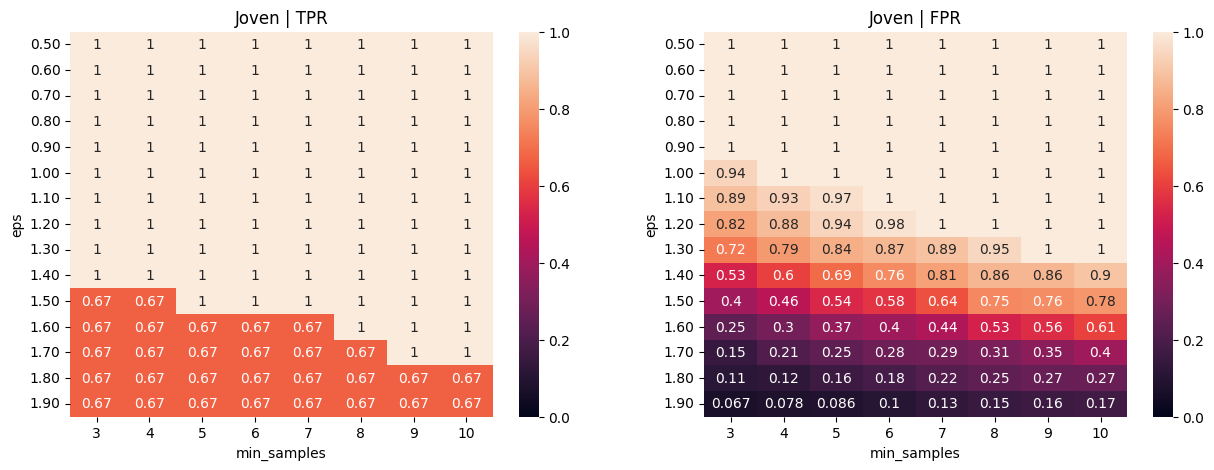

In [ ]:
hp_hmap(sdf[sdf['segmentacion_etaria']=='Joven'], 'Joven')

En este caso se observan que para la mayoria de las configuraciones se detectaron todos los fraudes en TPR, pero a costa de muchos falsos positivos en la maypría de casos de FPR. La configuración a utilizar depende de que error tiene mas impacto según la entidad bancaria.

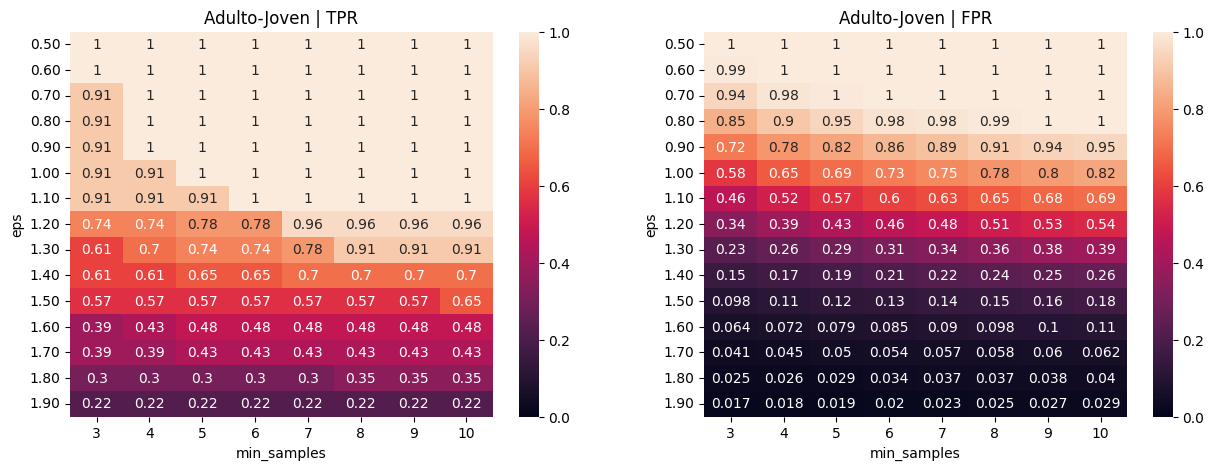

In [ ]:
hp_hmap(sdf[sdf['segmentacion_etaria']=='Adulto-Joven'], 'Adulto-Joven')

En esta sección, las configuraciones e eps y min samples en general da mejores resultados que en el caso anterior, sin embargo, la combinación de estos valores sigue dependiendo del impacto de los errores.

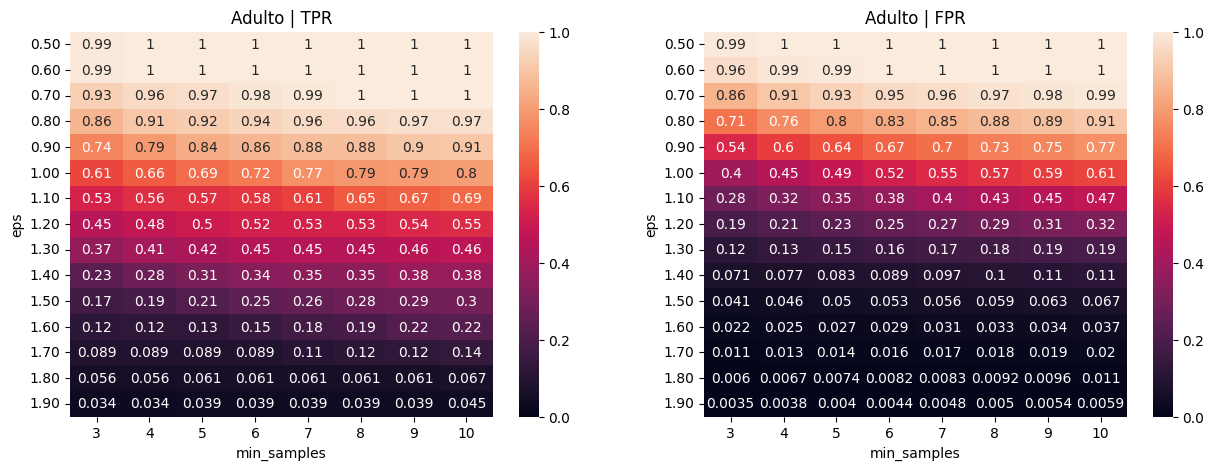

In [ ]:
hp_hmap(sdf[sdf['segmentacion_etaria']=='Adulto'], 'Adulto')

Aqui puede verse que en general se ha mejorado el FPR pero a costa del TPR.]

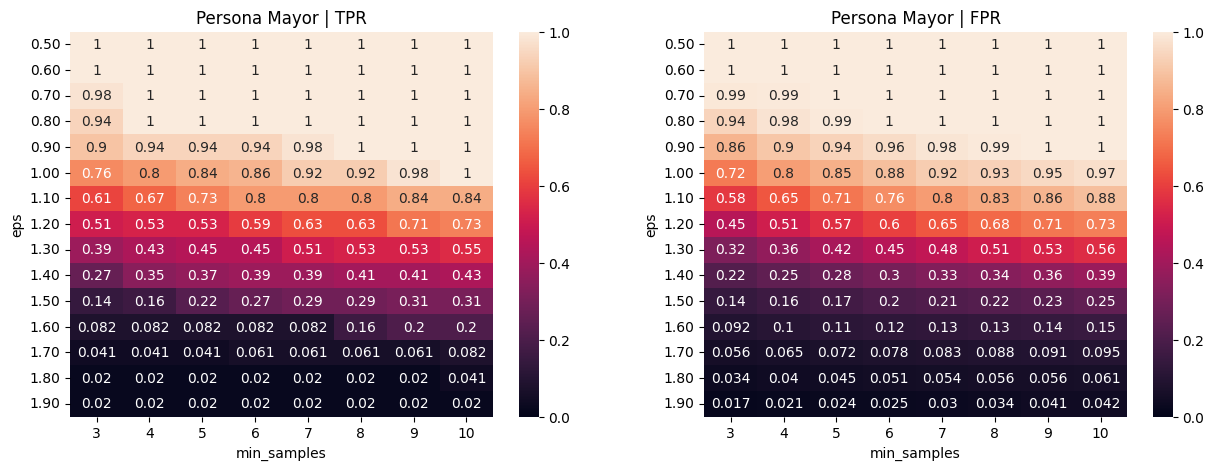

In [ ]:
hp_hmap(sdf[sdf['segmentacion_etaria']=='Persona Mayor'], 'Persona Mayor')

### Calculo de P y R para el set total

In [218]:
db_anomaly_list = spca['db_anomalies'].map({'Normal': 0, 'Anomaly': 1}).tolist()
iso_anomaly_list = spca['iso_anomalies'].map({'Normal': 0, 'Anomaly': 1}).tolist()

print("Lista para 'db_anomalies':", db_anomaly_list)
print("Lista para 'iso_anomalies':", iso_anomaly_list)


Lista para 'db_anomalies': [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 

In [253]:
from sklearn.metrics import confusion_matrix

def calculate_tp_fp_fn(predicted_labels, true_labels):
    cm = confusion_matrix(true_labels, predicted_labels)
    tn, fp, fn, tp = cm.ravel()
    return tp, fp, fn


In [256]:
real_fraud = spca['fraud_bool'].to_list()

In [258]:
# Convertir elementos a números enteros
real_fraud = list(map(int, real_fraud))

#### P y R para dbscan

In [259]:
tp, fp, fn = calculate_tp_fp_fn(db_anomaly_list, real_fraud)

print("TP:", tp)
print("FP:", fp)
print("FN:", fn)


TP: 134
FP: 5781
FN: 120


In [260]:
def calculate_precision_recall(tp, fp, fn):
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    return precision, recall



# Calcular P y R
precision, recall = calculate_precision_recall(134, 5781, 120)

# Imprimir los resultados
print("Precisión (P):", precision)
print("Recuerdo (R):", recall)


Precisión (P): 0.022654268808114962
Recuerdo (R): 0.5275590551181102


#### P y R para isolation forest

In [261]:
tp, fp, fn = calculate_tp_fp_fn(iso_anomaly_list, real_fraud)

print("TP:", tp)
print("FP:", fp)
print("FN:", fn)


TP: 84
FP: 3213
FN: 170


In [262]:
# Calcular P y R
precision, recall = calculate_precision_recall(84, 3213, 170)

# Imprimir los resultados
print("Precisión (P):", precision)
print("Recuerdo (R):", recall)

Precisión (P): 0.025477707006369428
Recuerdo (R): 0.33070866141732286


### ¿Qué significan los ratios y sus valores?

R. 
Precision (P): La precisión representa la proporción de ejemplos clasificados correctamente como positivos (fraudes) sobre el total de ejemplos clasificados como positivos (tanto verdaderos como falsos). Un valor alto de precisión indica que el modelo tiene una baja tasa de falsos positivos.

Recall (R): El recall, también conocido como sensibilidad o tasa de verdaderos positivos, representa la proporción de ejemplos clasificados correctamente como positivos (fraudes) sobre el total de ejemplos que realmente son positivos (fraudes). Un valor alto de recuerdo indica que el modelo tiene una baja tasa de falsos negativos.

### ¿Qué tan correctas fueron las predicciones realizadas por su modelo según los ratios calculados?
R.

Para DBSCAN:

- La precision (P) es muy baja, aproximadamente 0.02, lo que indica que el modelo tiene una alta tasa de falsos positivos, es decir, clasifica muchos casos como fraudes cuando en realidad no lo son.
- El recall (R) es más alto, aproximadamente 0.53, lo que indica que el modelo tiene una tasa relativamente baja de falsos negativos, es decir, clasifica correctamente una proporción significativa de los casos que son fraudes.

Para Isolation Forest:

- La precisión (P) también es baja, aproximadamente 0.03, lo que indica una alta tasa de falsos positivos, similar a DBSCAN.
- El recuerdo (R) es más bajo que en DBSCAN, aproximadamente 0.33, lo que indica una tasa de falsos negativos más alta, es decir, clasifica correctamente una proporción menor de los casos que son fraudes.

### ¿Son coherentes los resultados obtenidos?
R.

En general, los resultados indican que ambos modelos tienen un desempeño deficiente en términos de precisión, ya que clasifican muchos casos como fraudes cuando no lo son. Sin embargo, tienen un rendimiento aceptable en términos de recall, ya que logran clasificar correctamente una proporción significativa de los casos que son fraudes. Por tanto, en primera instancia, los resultados son coherentes pues logran detectar la maypria de los casos de fraude pero a costa de tener varios falsos positivos, lo cual debe mejorarse en futuras iteraciones.

### ¿Cómo se comportan los casos de fraudes para los diferentes rangos etarios?
R. Esto ya se adelantó en la sección anterior donde se observan los mapas de calor, siguiendo un comportamiento distinto para cada caso, teniendo el mejor comportamiento en el segmento de adulto-joven, y el peor comportamiento en el segmento de adulto mayor.